## MACS30000 Assignment 7: Exploring the GSS (Lab Notebook)
### Leoson Hoay
### November 27 2017

**Importing necessary packages:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read in CSV file:**

In [2]:
gss_df = pd.read_csv("../../assignments/exploratory-data-analysis/data/gss2012.csv")

### Age related plots:

Text(0,0.5,'count')

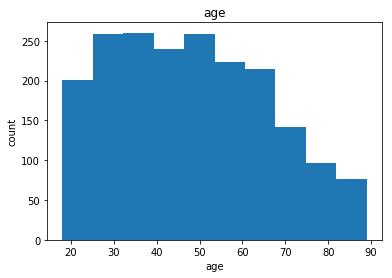

In [3]:
%matplotlib inline
pd.DataFrame.hist(gss_df, column="age", bins = 10, grid = False)
plt.xlabel('age')
plt.ylabel('count')

We may observe from the histogram that the sample population had a good proportion of its respondents between ages 30-60+. We may increase the bin number to observe patterns in higher fidelity:

Text(0,0.5,'count')

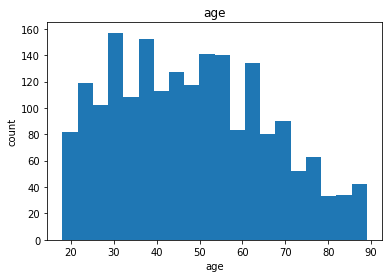

In [4]:
%matplotlib inline
pd.DataFrame.hist(gss_df, column="age", bins = 20, grid = False)
plt.xlabel('age')
plt.ylabel('count')

Look at this plot, we can observe several peaks - for example at the mid-thirties range, the mid-fifties, and interestingly a sharp peak at the mid-sixties. 

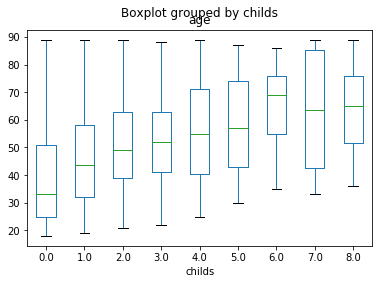

In [5]:
#Age against number of children
bp_age = gss_df.boxplot("age", "childs", grid = False)

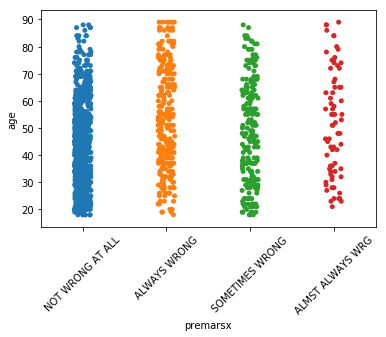

In [6]:
#Age against premarital sex
sp_premars_age = sns.stripplot(x = "premarsx", y = "age", data = gss_df, jitter = True)
for item in sp_premars_age.get_xticklabels():
    item.set_rotation(45)

It is interesting to see that the dispersion of attitudes towards premarital sex are rather similar across generations, mostly clustering around the extremes (Not wrong at all vs Always Wrong). It will also be good to look at the general distribution of these attitudes:

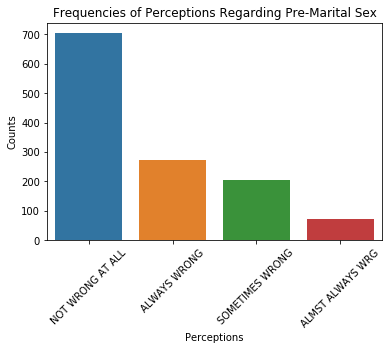

In [42]:
cp_premars = sns.countplot(x="premarsx", data=gss_df)
cp_premars.set(title = "Frequencies of Perceptions Regarding Pre-Marital Sex", xlabel='Perceptions', ylabel='Counts')
for item in cp_premars.get_xticklabels():
    item.set_rotation(45)

Here we see that the general attitudes towards premarital sex tend toward the liberal end (Not Wrong At All). Let's also plot a piechart. 

In [8]:
pie_df = gss_df["premarsx"].value_counts().reset_index().rename(columns={'index': 'Attitudes', 0: 'count'})

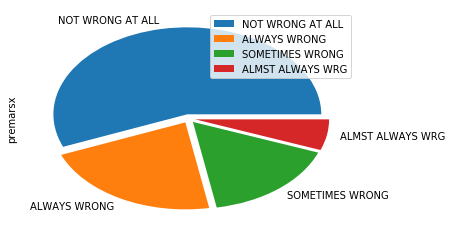

In [9]:
pie_df.plot(kind = "pie", y = "premarsx", labels = pie_df["Attitudes"], explode = (0.05, 0.05, 0.05, 0.05))

That was somewhat fun, but probably not the ideal type of visualization.

### Educational Level

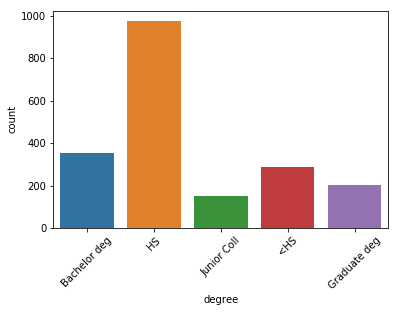

In [10]:
cp_degree = sns.countplot(x="degree", data=gss_df)
for item in cp_degree.get_xticklabels():
    item.set_rotation(45)

The largest number of respondents have an highest educational attainment of high school.

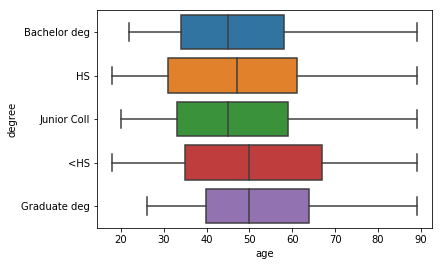

In [11]:
sns.boxplot(x="age", y="degree", data=gss_df)

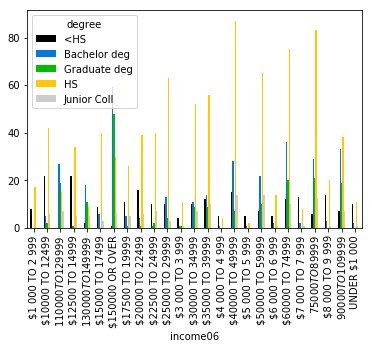

In [12]:
gss_df.groupby(['income06', 'degree']).size().unstack().plot.bar(colormap = "nipy_spectral")

While it is interesting to look at the different distributions of degree attainment and their respective incomes, one must keep in mind that since 'High school' has the largest frequency, it will probably still be the largest group across different income strata. Hence it is difficult to generalize a relationship between income and educational level purely from the raw numbers.

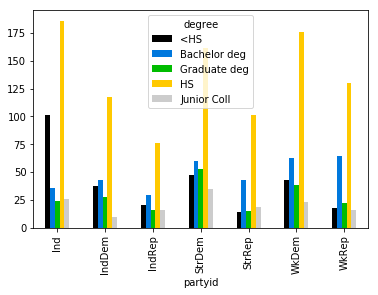

In [13]:
gss_df.groupby(['partyid', 'degree']).size().unstack().plot.bar(colormap = "nipy_spectral")

Once again, comparing, distribution of educational attainment this time over party identification.

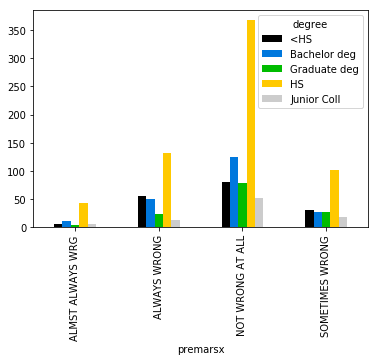

In [14]:
gss_df.groupby(['premarsx', 'degree']).size().unstack().plot.bar(colormap = "nipy_spectral")

Now, against views on pre-marital sex. However, as usual, the high proportion of the 'High School' category makes it a little more misleading to take these graphs at face value. We might wish to use a factorplot.

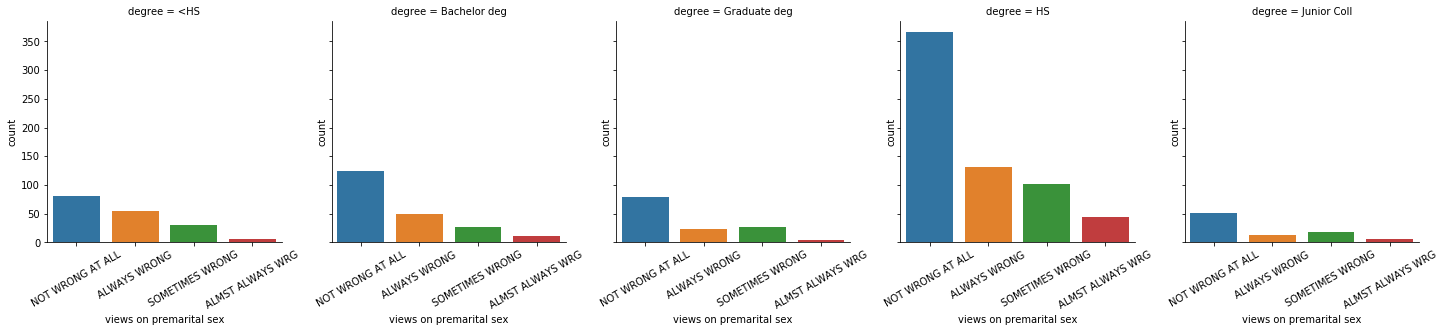

In [15]:
ax = sns.factorplot(col_wrap = 5, x="premarsx", col = "degree",
                    col_order=['<HS','Bachelor deg','Graduate deg','HS', 'Junior Coll'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='views on premarital sex', ylabel='count');
ax.set_xticklabels(rotation=30)

Aha, now we can see more clearly the relative distributions for each degree attainment level, as they are now put side by side but still share the same axes. Let's do the same for educational level and party identification.

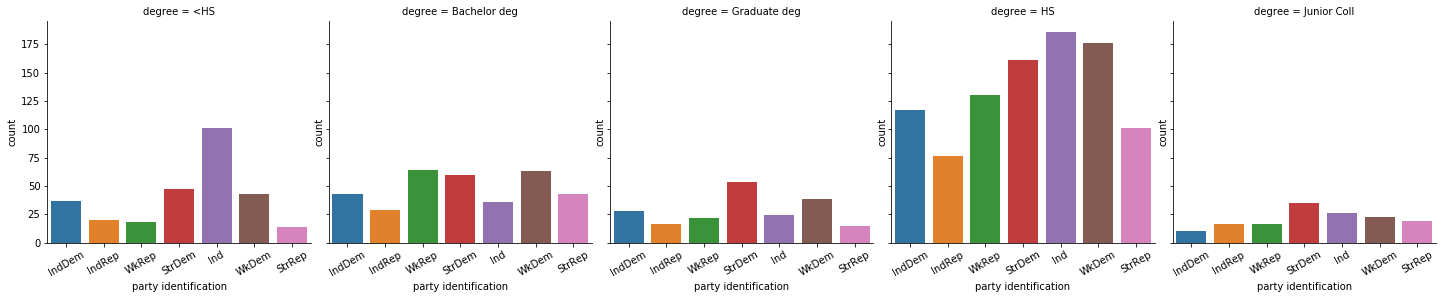

In [16]:
ax = sns.factorplot(col_wrap = 5, x="partyid", col = "degree",
                    col_order=['<HS','Bachelor deg','Graduate deg','HS', 'Junior Coll'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='party identification', ylabel='count');
ax.set_xticklabels(rotation=30)

Here we can see some clear differences between the relative distributions and the peaks at each level of educational attainment. This can be explored further in the writeup.

Let's do something more trivial and compare if there are differences in television watching habits between different educational levels.

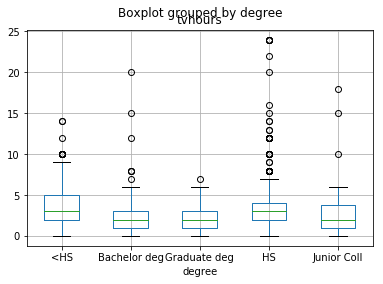

In [17]:
bp_tv_degree = gss_df.boxplot("tvhours", "degree") 

How about educational level and news reading frequencies?

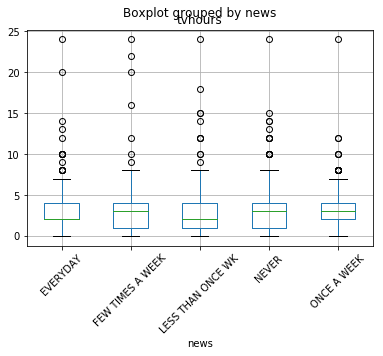

In [18]:
bp_tv_degree = gss_df.boxplot("tvhours", "news") 
for item in bp_tv_degree.get_xticklabels():
    item.set_rotation(45)

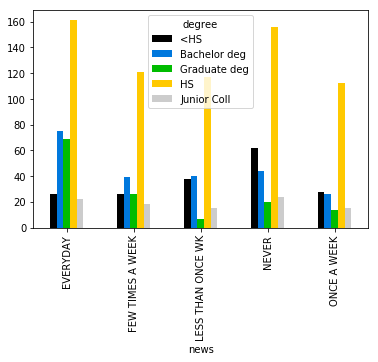

In [19]:
#degree and news reading frequencies?
gss_df.groupby(['news', 'degree']).size().unstack().plot.bar(colormap = "nipy_spectral")

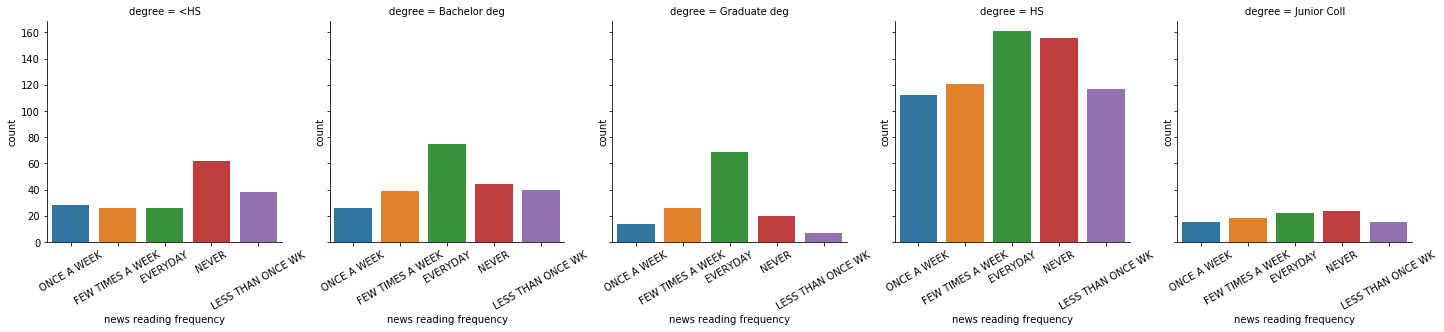

In [20]:
ax = sns.factorplot(col_wrap = 5, x="news", col = "degree",
                    col_order=['<HS','Bachelor deg','Graduate deg','HS', 'Junior Coll'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='news reading frequency', ylabel='count');
ax.set_xticklabels(rotation=30)

We can see here that the news reading frequencies of individuals holding less than a high school degree are markedly different from the others.

### Income exploration

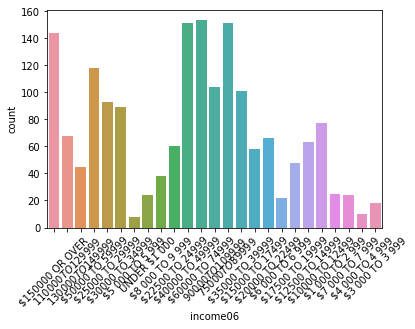

In [21]:
cp_income06 = sns.countplot(x="income06", data=gss_df)
for item in cp_income06.get_xticklabels():
    item.set_rotation(45)

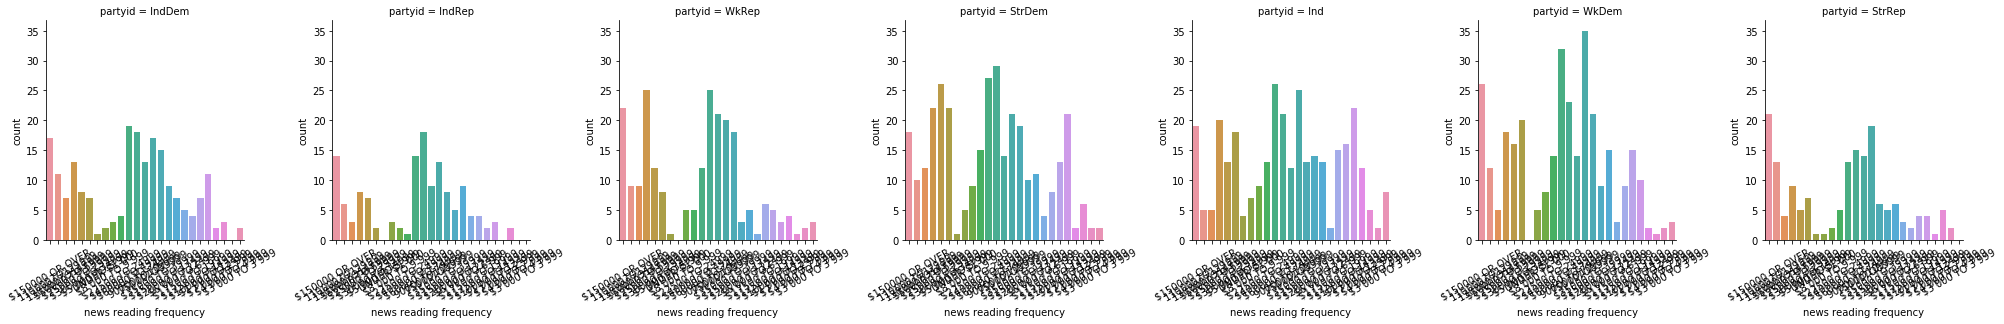

In [22]:
#Income vs party identification
ax = sns.factorplot(x="income06", col = "partyid",
                    col_order=['IndDem','IndRep','WkRep','StrDem', 'Ind', 'WkDem', 'StrRep'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='news reading frequency', ylabel='count');
ax.set_xticklabels(rotation=30)

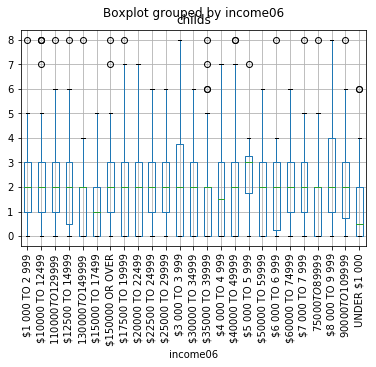

In [23]:
#Income and children
bp_childs_income06 = gss_df.boxplot("childs", "income06") 
for item in bp_childs_income06.get_xticklabels():
    item.set_rotation(90)

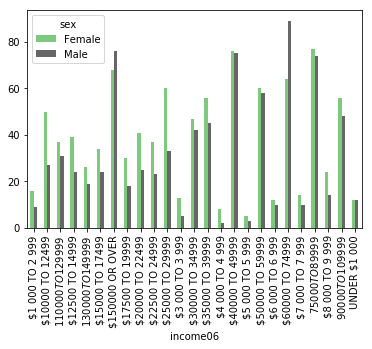

In [24]:
#income and gender
gss_df.groupby(['income06', 'sex']).size().unstack().plot.bar(colormap = "Accent")

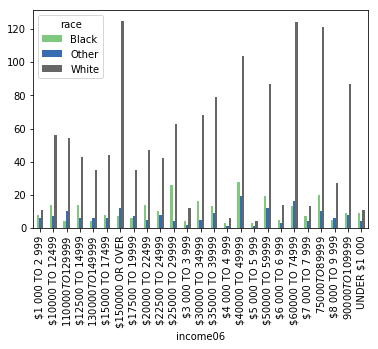

In [25]:
#income and race
gss_df.groupby(['income06', 'race']).size().unstack().plot.bar(colormap = "Accent")

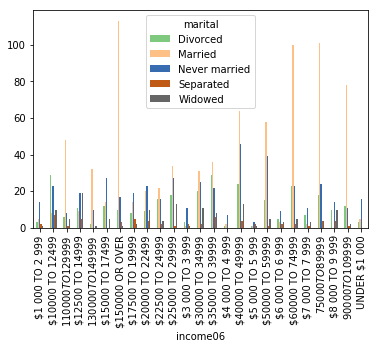

In [26]:
#income and marital status
gss_df.groupby(['income06', 'marital']).size().unstack().plot.bar(colormap = "Accent")


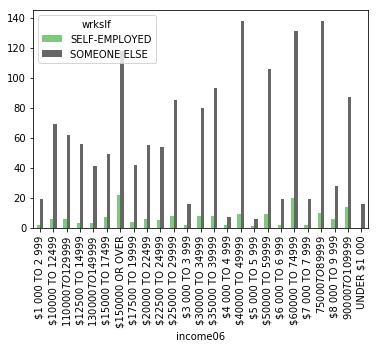

In [27]:
#income and work(for self or others)
gss_df.groupby(['income06', 'wrkslf']).size().unstack().plot.bar(colormap = "Accent")

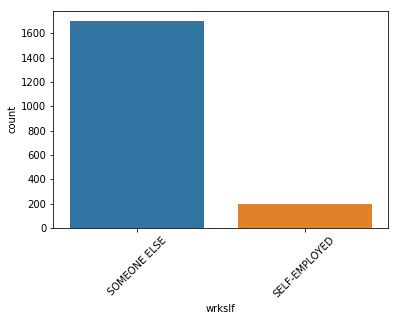

In [28]:
#Proportion of self-employed vs working for others
cp_wrkslf = sns.countplot(x="wrkslf", data=gss_df)
for item in cp_wrkslf.get_xticklabels():
    item.set_rotation(45)

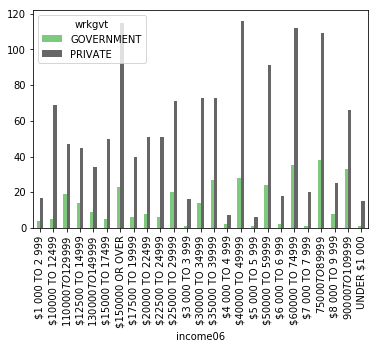

In [29]:
#income vs work(govt or private)
gss_df.groupby(['income06', 'wrkgvt']).size().unstack().plot.bar(colormap = "Accent")

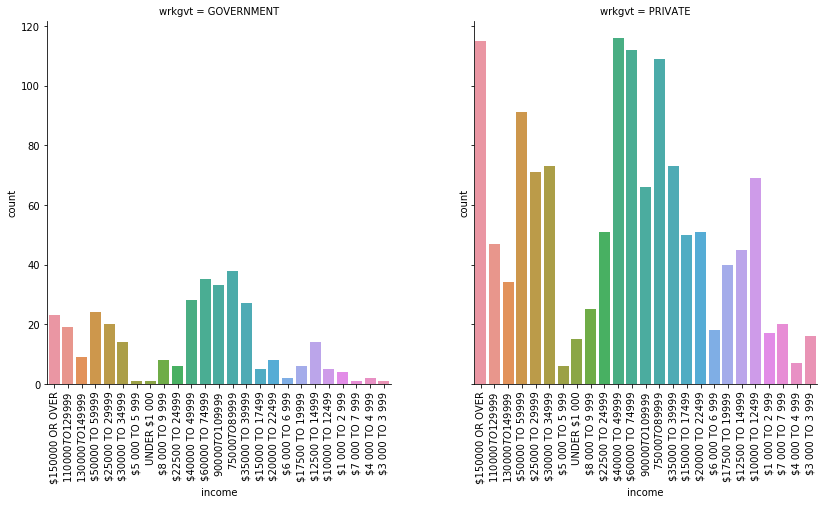

In [30]:
#Same as above, but using a factorplot
ax = sns.factorplot(col_wrap = 2, x="income06", col = "wrkgvt",
                    col_order=['GOVERNMENT','PRIVATE'],
                    data=gss_df, kind="count", size = 6, sharex = False)
ax.set(xlabel='income', ylabel='count');
ax.set_xticklabels(rotation=90)

### Political Views and Party Affiliations

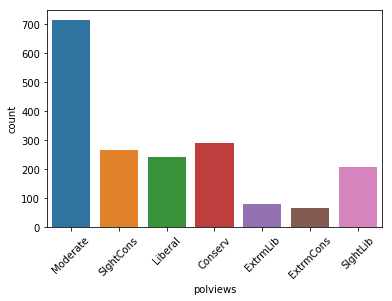

In [31]:
#distribution of political views
cp_polviews = sns.countplot(x="polviews", data=gss_df)
for item in cp_polviews.get_xticklabels():
    item.set_rotation(45)


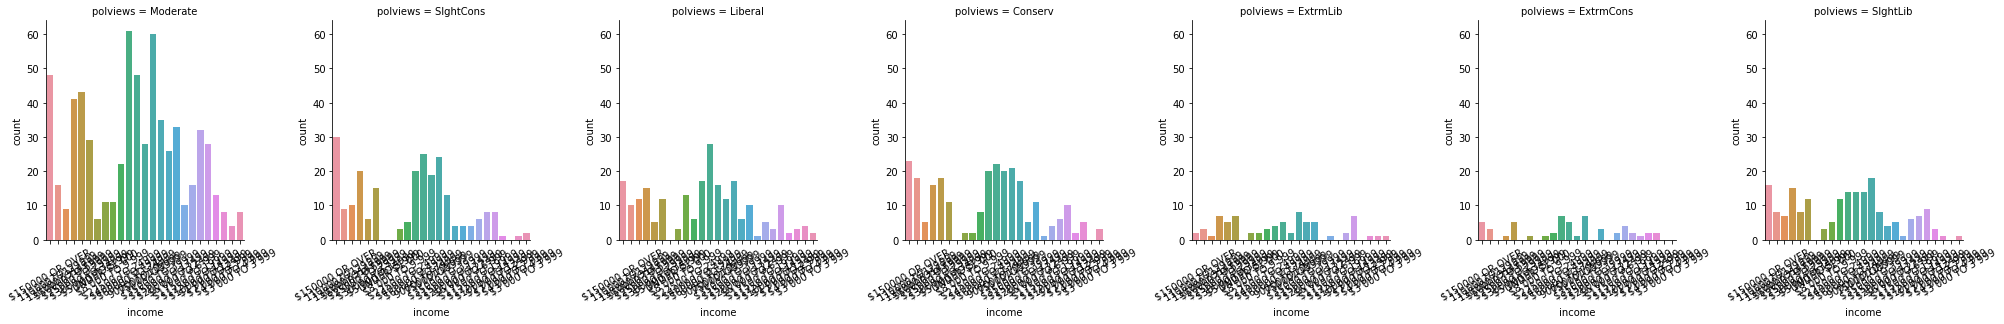

In [32]:
#political views and income
ax = sns.factorplot(x="income06", col = "polviews",
                    col_order=['Moderate','SlghtCons','Liberal','Conserv', 'ExtrmLib', 'ExtrmCons', 'SlghtLib'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='income', ylabel='count');
ax.set_xticklabels(rotation=30)

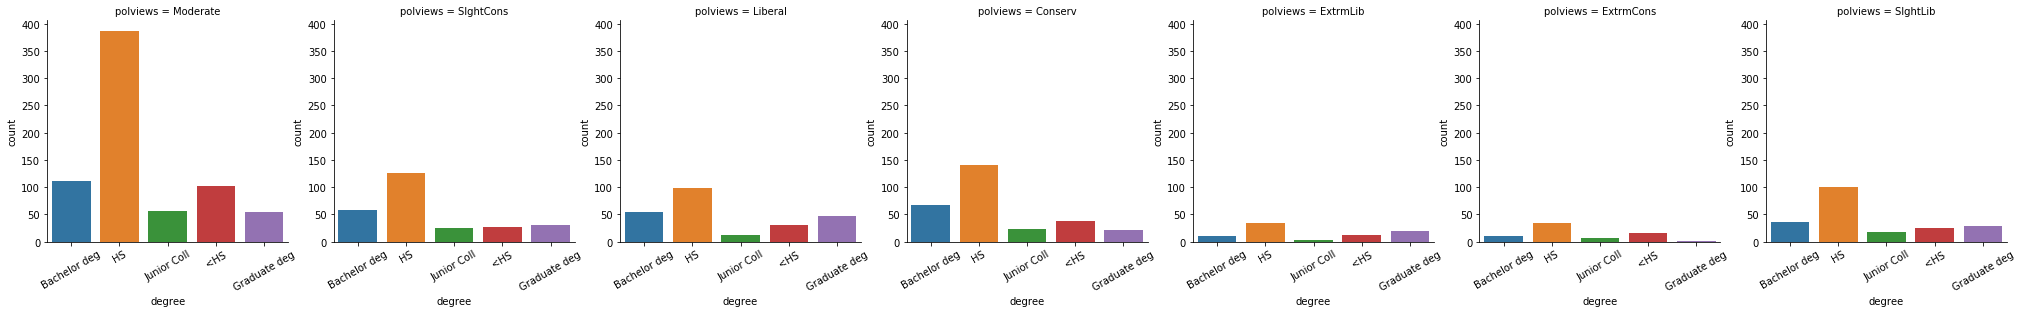

In [33]:
#political views and educational level
ax = sns.factorplot(x="degree", col = "polviews",
                    col_order=['Moderate','SlghtCons','Liberal','Conserv', 'ExtrmLib', 'ExtrmCons', 'SlghtLib'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='degree', ylabel='count');
ax.set_xticklabels(rotation=30)

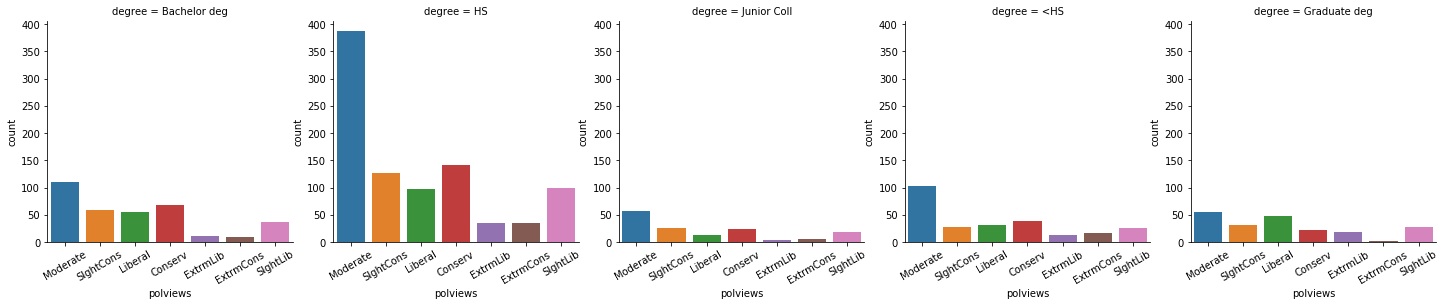

In [34]:
#Same as above, but axes reversed
ax = sns.factorplot(x="polviews", col = "degree",
                    col_order=['Bachelor deg','HS','Junior Coll','<HS', 'Graduate deg'],
                    data=gss_df, kind="count", size = 4, sharex = False)
ax.set(xlabel='polviews', ylabel='count');
ax.set_xticklabels(rotation=30)

Tendency towards moderation may be driven by self-report factors, or just a central tendency.

### Happiness

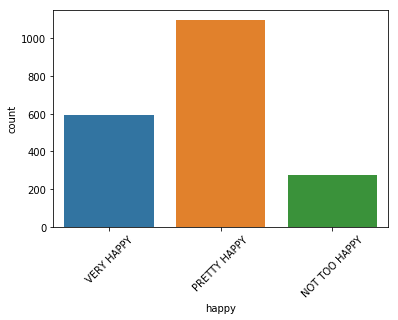

In [35]:
#happiness distribution
cp_happy = sns.countplot(x="happy", data=gss_df)
for item in cp_happy.get_xticklabels():
    item.set_rotation(45)

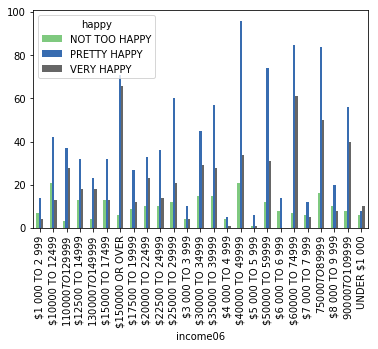

In [36]:
#income and happiness
gss_df.groupby(['income06', 'happy']).size().unstack().plot.bar(colormap = "Accent")

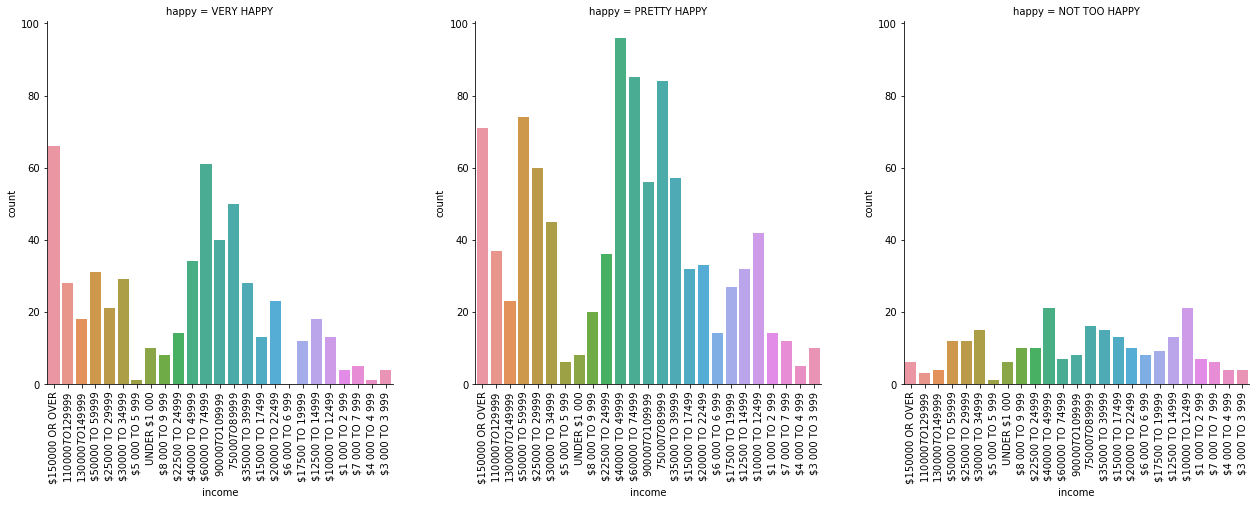

In [37]:
ax = sns.factorplot(x="income06", col = "happy",
                    col_order=['VERY HAPPY','PRETTY HAPPY','NOT TOO HAPPY'],
                    data=gss_df, kind="count", size = 6, sharex = False)
ax.set(xlabel='income', ylabel='count');
ax.set_xticklabels(rotation=90)

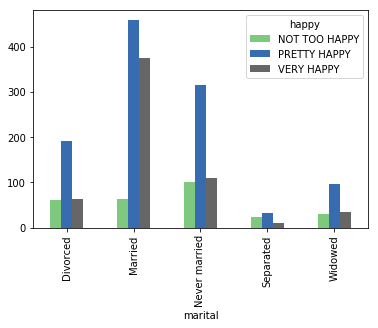

In [38]:
#happiness and marital status
gss_df.groupby(['marital', 'happy']).size().unstack().plot.bar(colormap = "Accent")

Being married seems to possibly imply a greater likelihood of being happy.

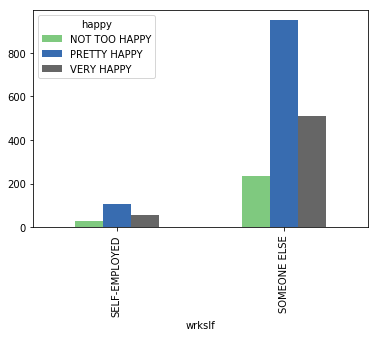

In [39]:
#happiness and work(self-employed or for others)
gss_df.groupby(['wrkslf', 'happy']).size().unstack().plot.bar(colormap = "Accent")

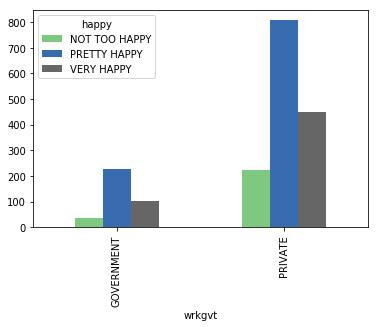

In [40]:
#happiness and work(govt or private)
gss_df.groupby(['wrkgvt', 'happy']).size().unstack().plot.bar(colormap = "Accent")